# Inżynieria cech

## Wprowadzenie

Inżynieria cech (ang. "feature engineering") to proces tworzenia, przekształcania i selekcjonowania cech w celu poprawy wydajności modeli uczenia maszynowego. Często mówi się, że dobre cechy są ważniejsze niż sam algorytm - nawet prosty model z dobrymi cechami może przewyższyć skomplikowany model z surowymi danymi. Należy jednak uważać, aby nie przesadzić - bywa i tak, że nadmiar wprowadzonych cech (lub nietrafne ich określanie) może właśnie popsuć model.

## Podstawowe techniki inżynierii cech

### 1. Transformacje numeryczne
- **Skalowanie**: StandardScaler, MinMaxScaler, RobustScaler
- **Transformacje nieliniowe**: logarytm, pierwiastek, potęgowanie
- **Binning**: dyskretyzacja ciągłych wartości na przedziały

### 2. Kodowanie zmiennych kategorycznych
- **One-Hot Encoding**: dla zmiennych nominalnych (bez porządku)
- **Label Encoding**: dla zmiennych uporządkowanych (z porządkiem, dających się ustawić w ciąg)
- **Target Encoding**: średnia wartości docelowej dla każdej kategorii
- **Frequency Encoding**: częstość występowania kategorii

### 3. Tworzenie nowych cech
- **Interakcje**: kombinacje istniejących cech (mnożenie, dzielenie)
- **Agregacje**: statystyki grupowe (suma, średnia, odchylenie)
- **Cechy domenowe**: wykorzystanie wiedzy o problemie
- **Cechy czasowe**: dzień tygodnia, miesiąc, sezonowość

### 4. Selekcja cech
- **Filter methods**: korelacja, test chi-kwadrat, mutual information
- **Wrapper methods**: RFE (Recursive Feature Elimination)
- **Embedded methods**: L1 regularization, feature importance z drzew

### 5. Ekstrakcja cech
- **PCA**: Principal Component Analysis - redukcja wymiarowości
  - PCA to technika redukcji wymiarowości, która przekształca dane do nowego układu współrzędnych, gdzie pierwsza składowa wyjaśnia maksymalną wariancję danych, druga składowa - maksymalną pozostałą wariancję prostopadłą do pierwszej, i tak dalej. Jest to metoda nienadzorowana - nie korzysta z informacji o klasach. PCA znajduje kierunki maksymalnej zmienności w danych i projektuje na nie punkty. Wykorzystywana jest głównie do kompresji danych, wizualizacji wysokowymiarowych zbiorów i usuwania skorelowanych cech. Nowe składowe (principal components) są liniowymi kombinacjami oryginalnych cech.
- **LDA**: Linear Discriminant Analysis - dla klasyfikacji
  - LDA to technika redukcji wymiarowości, która maksymalizuje separację między klasami, minimalizując jednocześnie rozrzut wewnątrz klas. W przeciwieństwie do PCA, LDA jest metodą nadzorowaną - wymaga informacji o przynależności do klas. LDA szuka projekcji, która maksymalizuje stosunek wariancji międzyklasowej do wariancji wewnątrzklasowej. Jest szczególnie przydatna w zadaniach klasyfikacji, gdzie chcemy wyraźnie oddzielić różne grupy. Maksymalna liczba składowych w LDA to liczba klas minus jeden.
- **Polynomial features**: cechy wielomianowe
  - "Polynomial features" to technika tworzenia nowych cech poprzez podnoszenie oryginalnych cech do wyższych potęg oraz tworzenie ich iloczynów (interakcji). Na przykład, z cech x₁ i x₂ możemy utworzyć: x₁², x₂², x₁·x₂, x₁³, x₂³, x₁²·x₂, x₁·x₂², itd. Umożliwia to modelom liniowym (jak regresja liniowa) uczenie się nieliniowych zależności w danych. Należy jednak uważać, bo liczba cech rośnie wykładniczo - dla n cech i stopnia d otrzymujemy O(nᵈ) nowych cech, co może prowadzić do przeuczenia. W praktyce często używa się stopnia 2 lub 3, rzadziej wyższych, i często w połączeniu z regularyzacją (Ridge, Lasso).







## Przykład 1: Klasyfikacja - Kompleksowa inżynieria cech dla zbioru ocalałych z katastrofy Titanica



DANE WEJŚCIOWE

Rozmiar zbioru: (800, 8)

Pierwsze wiersze:
        Wiek       Cena  Klasa       Plec  Rodzenstwo  Rodzice         Port  \
0  37.450712  82.057950      3    kobieta           0        2  Southampton   
1  27.926035   9.262119      2  mezczyzna           0        0  Southampton   
2  39.715328  23.200670      1  mezczyzna           0        0   Queenstown   
3  52.845448  10.040100      3  mezczyzna           0        0  Southampton   
4  26.487699  10.467295      2  mezczyzna           1        0  Southampton   

   Przezycie  
0          1  
1          0  
2          1  
3          0  
4          0  

Informacje o danych:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Wiek        800 non-null    float64
 1   Cena        800 non-null    float64
 2   Klasa       800 non-null    int64  
 3   Plec        800 non-null    object 
 4 

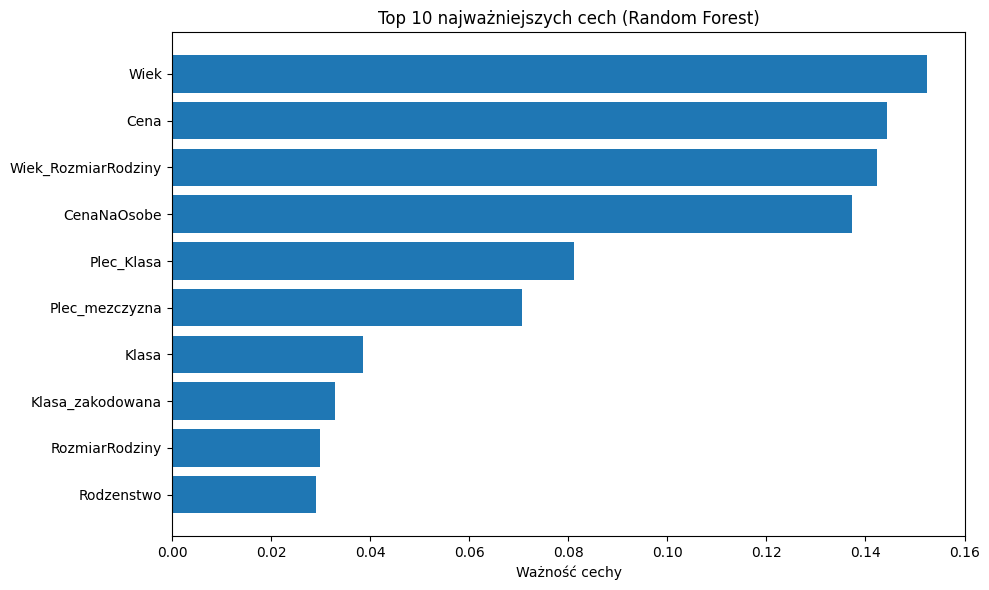


PORÓWNANIE MODELI

Model na podstawowych cechach:
  CV Accuracy: 0.7078 (+/- 0.0307)

Model po inżynierii cech:
  CV Accuracy: 0.6750 (+/- 0.0412)

Model po selekcji cech:
  CV Accuracy: 0.6875 (+/- 0.0339)


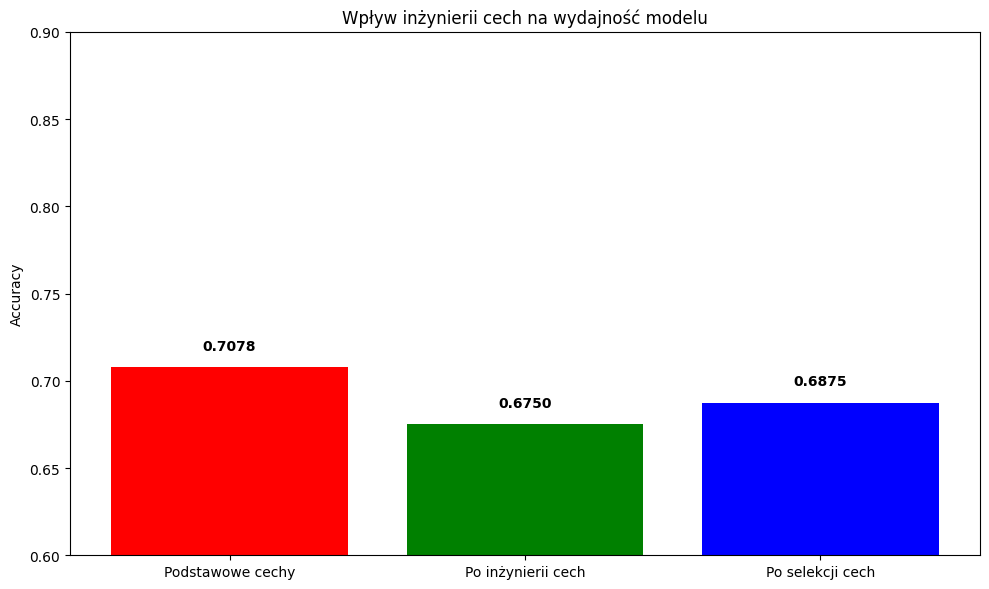


FINALNA OCENA NA ZBIORZE TESTOWYM

Raport klasyfikacji:
              precision    recall  f1-score   support

           0       0.75      0.82      0.78       100
           1       0.64      0.53      0.58        60

    accuracy                           0.71       160
   macro avg       0.69      0.68      0.68       160
weighted avg       0.71      0.71      0.71       160



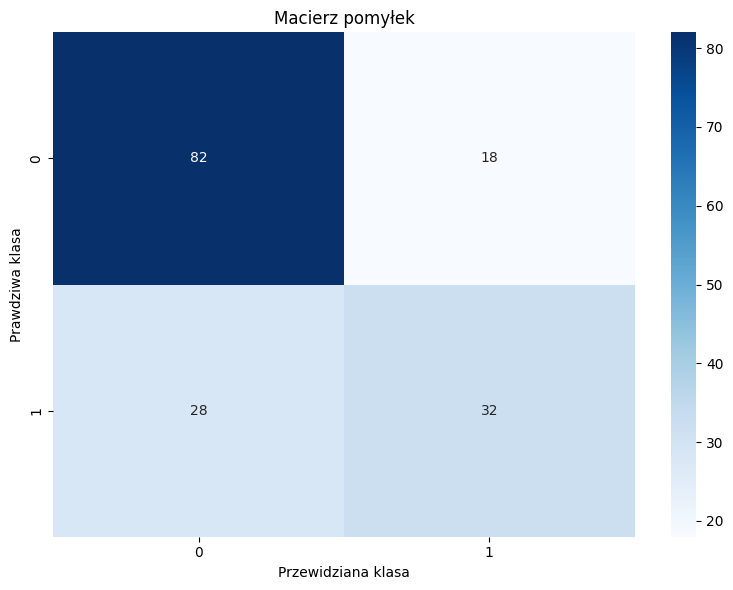


Wnioski:
UWAGA: W tym przypadku inżynieria cech POGORSZYŁA wyniki!
- To normalne. Nie każda inżynieria cech 'działa'
- Zbyt wiele cech może prowadzić do przeuczenia
- Proste dane + prosty model często = najlepsze wyniki
- Zawsze należy sprawdzać wpływ nowych cech!
- W praktyce trzeba testować różne ich kombinacje i wybrać najlepszą


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Utworzenie syntetycznego zbioru danych podobnego do Titanica
np.random.seed(42)
n_samples = 800

# Generowanie danych syntetycznych
data = pd.DataFrame({
    'Wiek': np.random.normal(30, 15, n_samples).clip(0.5, 80),
    'Cena': np.random.lognormal(3, 1.5, n_samples).clip(0, 500),
    'Klasa': np.random.choice([1, 2, 3], n_samples, p=[0.2, 0.3, 0.5]),
    'Plec': np.random.choice(['mezczyzna', 'kobieta'], n_samples, p=[0.65, 0.35]),
    'Rodzenstwo': np.random.choice([0, 1, 2, 3], n_samples, p=[0.6, 0.25, 0.1, 0.05]),
    'Rodzice': np.random.choice([0, 1, 2], n_samples, p=[0.7, 0.2, 0.1]),
    'Port': np.random.choice(['Southampton', 'Cherbourg', 'Queenstown'], n_samples, p=[0.7, 0.2, 0.1])
})
# 'Port' oznacza 'port zaokrętowania'.


# Generowanie zmiennej docelowej z zależnościami
survived_prob = (
    0.1 +  # baseline
    (data['Plec'] == 'kobieta').astype(int) * 0.4 +  # kobiety mają wyższą szansę
    (data['Klasa'] == 1).astype(int) * 0.3 +  # pierwsza klasa ma wyższą szansę
    (data['Wiek'] < 15).astype(int) * 0.2 +  # dzieci mają wyższą szansę
    np.random.normal(0, 0.15, n_samples)  # szum
).clip(0, 1)

data['Przezycie'] = (np.random.random(n_samples) < survived_prob).astype(int)

print("="*70)
print("DANE WEJŚCIOWE")
print("="*70)
print(f"\nRozmiar zbioru: {data.shape}")
print(f"\nPierwsze wiersze:\n{data.head()}")
print(f"\nInformacje o danych:")
print(data.info())
print(f"\nRozkład klasy docelowej:\n{data['Przezycie'].value_counts()}")
print(f"\nBrakujące wartości:\n{data.isnull().sum()}")

# Wprowadzenie kilku brakujących wartości
data.loc[np.random.choice(data.index, 50, replace=False), 'Wiek'] = np.nan
data.loc[np.random.choice(data.index, 20, replace=False), 'Cena'] = np.nan

print(f"\nBrakujące wartości po wprowadzeniu braków:\n{data.isnull().sum()}")

# Podział na X i y
X = data.drop('Przezycie', axis=1)
y = data['Przezycie']

# Podział train-test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n" + "="*70)
print("INŻYNIERIA CECH - KROK PO KROKU")
print("="*70)

# KROK 1: Uzupełnienie brakujących wartości
print("\nKROK 1: Uzupełnienie brakujących wartości")

X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# Uzupełnienie wieku medianą
wiek_median = X_train_fe['Wiek'].median()
X_train_fe['Wiek'].fillna(wiek_median, inplace=True)
X_test_fe['Wiek'].fillna(wiek_median, inplace=True)

# Uzupełnienie ceny medianą
cena_median = X_train_fe['Cena'].median()
X_train_fe['Cena'].fillna(cena_median, inplace=True)
X_test_fe['Cena'].fillna(cena_median, inplace=True)

print(f"  Uzupełniono Wiek medianą: {wiek_median:.2f}")
print(f"  Uzupełniono Cena medianą: {cena_median:.2f}")

# KROK 2: Tworzenie nowych cech
print("\nKROK 2: Tworzenie nowych cech")

# RozmiarRodziny = Rodzenstwo + Rodzice + 1
X_train_fe['RozmiarRodziny'] = X_train_fe['Rodzenstwo'] + X_train_fe['Rodzice'] + 1
X_test_fe['RozmiarRodziny'] = X_test_fe['Rodzenstwo'] + X_test_fe['Rodzice'] + 1

# CzySam - czy pasażer podróżuje sam
X_train_fe['CzySam'] = (X_train_fe['RozmiarRodziny'] == 1).astype(int)
X_test_fe['CzySam'] = (X_test_fe['RozmiarRodziny'] == 1).astype(int)

# GrupaWiekowa - grupowanie wieku
def kategoryzuj_wiek(wiek):
    if wiek < 12:
        return 'Dziecko'
    elif wiek < 18:
        return 'Nastolatek'
    elif wiek < 65:
        return 'Dorosly'
    else:
        return 'Senior'

X_train_fe['GrupaWiekowa'] = X_train_fe['Wiek'].apply(kategoryzuj_wiek)
X_test_fe['GrupaWiekowa'] = X_test_fe['Wiek'].apply(kategoryzuj_wiek)

# CenaNaOsobe - cena na osobę w rodzinie
X_train_fe['CenaNaOsobe'] = X_train_fe['Cena'] / X_train_fe['RozmiarRodziny']
X_test_fe['CenaNaOsobe'] = X_test_fe['Cena'] / X_test_fe['RozmiarRodziny']

# PrzedzialCeny - dyskretyzacja ceny biletu
X_train_fe['PrzedzialCeny'] = pd.qcut(X_train_fe['Cena'], q=4, labels=['Niska', 'Srednia', 'Wysoka', 'BardzoWysoka'], duplicates='drop')
# Dla test używamy tych samych przedziałów co dla train
cena_bins = pd.qcut(X_train_fe['Cena'], q=4, retbins=True, duplicates='drop')[1]
X_test_fe['PrzedzialCeny'] = pd.cut(X_test_fe['Cena'], bins=cena_bins, labels=['Niska', 'Srednia', 'Wysoka', 'BardzoWysoka'], include_lowest=True)

print("  Utworzono cechy:")
print("    - RozmiarRodziny: liczba członków rodziny")
print("    - CzySam: czy pasażer sam")
print("    - GrupaWiekowa: kategoria wieku")
print("    - CenaNaOsobe: cena na osobę")
print("    - PrzedzialCeny: przedział cenowy")

# KROK 3: Kodowanie zmiennych kategorycznych
print("\nKROK 3: Kodowanie zmiennych kategorycznych")

# Label Encoding dla zmiennych ordinalnych
X_train_fe['Klasa_zakodowana'] = X_train_fe['Klasa']
X_test_fe['Klasa_zakodowana'] = X_test_fe['Klasa']

# One-Hot Encoding dla zmiennych nominalnych
categorical_cols = ['Plec', 'Port', 'GrupaWiekowa', 'PrzedzialCeny']

for col in categorical_cols:
    # One-hot encoding
    train_dummies = pd.get_dummies(X_train_fe[col], prefix=col, drop_first=True)
    test_dummies = pd.get_dummies(X_test_fe[col], prefix=col, drop_first=True)

    # Upewnij się, że test ma te same kolumny co train
    for col_dummy in train_dummies.columns:
        if col_dummy not in test_dummies.columns:
            test_dummies[col_dummy] = 0

    X_train_fe = pd.concat([X_train_fe, train_dummies], axis=1)
    X_test_fe = pd.concat([X_test_fe, test_dummies], axis=1)

print(f"  Zakodowano {len(categorical_cols)} zmiennych kategorycznych")

# KROK 4: Interakcje cech
print("\nKROK 4: Tworzenie interakcji między cechami")

# Interakcja: Plec z Klasa
X_train_fe['Plec_Klasa'] = (X_train_fe['Plec_mezczyzna'] * X_train_fe['Klasa_zakodowana'])
X_test_fe['Plec_Klasa'] = (X_test_fe['Plec_mezczyzna'] * X_test_fe['Klasa_zakodowana'])

# Interakcja: Wiek z RozmiarRodziny
X_train_fe['Wiek_RozmiarRodziny'] = X_train_fe['Wiek'] * X_train_fe['RozmiarRodziny']
X_test_fe['Wiek_RozmiarRodziny'] = X_test_fe['Wiek'] * X_test_fe['RozmiarRodziny']

print("  Utworzono interakcje: Plec_Klasa, Wiek_RozmiarRodziny")

# Usunięcie oryginalnych kolumn kategorycznych
cols_to_drop = ['Plec', 'Port', 'GrupaWiekowa', 'PrzedzialCeny']
X_train_fe.drop(cols_to_drop, axis=1, inplace=True)
X_test_fe.drop(cols_to_drop, axis=1, inplace=True)

# KROK 5: Skalowanie cech numerycznych
print("\nKROK 5: Skalowanie cech numerycznych")

numerical_cols = ['Wiek', 'Cena', 'CenaNaOsobe', 'Wiek_RozmiarRodziny']
scaler = StandardScaler()

X_train_fe[numerical_cols] = scaler.fit_transform(X_train_fe[numerical_cols])
X_test_fe[numerical_cols] = scaler.transform(X_test_fe[numerical_cols])

print(f"  Przeskalowano {len(numerical_cols)} cech numerycznych")

print(f"\nLiczba cech po inżynierii: {X_train_fe.shape[1]}")
print(f"Lista cech: {list(X_train_fe.columns)}")

# KROK 6: Selekcja cech - porównanie metod
print("\n" + "="*70)
print("SELEKCJA CECH")
print("="*70)

# Metoda 1: SelectKBest z mutual information
selector_mi = SelectKBest(mutual_info_classif, k=10)
X_train_mi = selector_mi.fit_transform(X_train_fe, y_train)
X_test_mi = selector_mi.transform(X_test_fe)

selected_features_mi = X_train_fe.columns[selector_mi.get_support()].tolist()
print(f"\nMetoda 1 - Mutual Information (top 10 cech):")
print(f"  {selected_features_mi}")

# Metoda 2: Feature importance z Random Forest
rf_temp = RandomForestClassifier(n_estimators=100, random_state=42)
rf_temp.fit(X_train_fe, y_train)

feature_importance = pd.DataFrame({
    'cecha': X_train_fe.columns,
    'waznosc': rf_temp.feature_importances_
}).sort_values('waznosc', ascending=False)

print(f"\nMetoda 2 - Feature Importance (Random Forest):")
print(feature_importance.head(10))

# Wizualizacja ważności cech
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['cecha'].head(10), feature_importance['waznosc'].head(10))
plt.xlabel('Ważność cechy')
plt.title('Top 10 najważniejszych cech (Random Forest)')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# KROK 7: Porównanie modeli
print("\n" + "="*70)
print("PORÓWNANIE MODELI")
print("="*70)

models_comparison = {}

# Model na surowych danych (tylko podstawowe kodowanie)
X_train_basic = X_train.copy()
X_test_basic = X_test.copy()

# Podstawowe przetworzenie
X_train_basic['Wiek'].fillna(X_train_basic['Wiek'].median(), inplace=True)
X_test_basic['Wiek'].fillna(X_train_basic['Wiek'].median(), inplace=True)
X_train_basic['Cena'].fillna(X_train_basic['Cena'].median(), inplace=True)
X_test_basic['Cena'].fillna(X_train_basic['Cena'].median(), inplace=True)

le = LabelEncoder()
for col in ['Plec', 'Port']:
    X_train_basic[col] = le.fit_transform(X_train_basic[col])
    X_test_basic[col] = le.transform(X_test_basic[col])

# Model 1: Na podstawowych cechach
lr_basic = LogisticRegression(max_iter=1000, random_state=42)
scores_basic = cross_val_score(lr_basic, X_train_basic, y_train, cv=5, scoring='accuracy')
models_comparison['Podstawowe cechy'] = scores_basic.mean()

print(f"\nModel na podstawowych cechach:")
print(f"  CV Accuracy: {scores_basic.mean():.4f} (+/- {scores_basic.std():.4f})")

# Model 2: Na cechach po inżynierii
lr_fe = LogisticRegression(max_iter=1000, random_state=42)
scores_fe = cross_val_score(lr_fe, X_train_fe, y_train, cv=5, scoring='accuracy')
models_comparison['Po inżynierii cech'] = scores_fe.mean()

print(f"\nModel po inżynierii cech:")
print(f"  CV Accuracy: {scores_fe.mean():.4f} (+/- {scores_fe.std():.4f})")

# Model 3: Po selekcji cech
lr_selected = LogisticRegression(max_iter=1000, random_state=42)
scores_selected = cross_val_score(lr_selected, X_train_mi, y_train, cv=5, scoring='accuracy')
models_comparison['Po selekcji cech'] = scores_selected.mean()

print(f"\nModel po selekcji cech:")
print(f"  CV Accuracy: {scores_selected.mean():.4f} (+/- {scores_selected.std():.4f})")

# Wykres porównania
plt.figure(figsize=(10, 6))
plt.bar(models_comparison.keys(), models_comparison.values(), color=['red', 'green', 'blue'])
plt.ylabel('Accuracy')
plt.title('Wpływ inżynierii cech na wydajność modelu')
plt.ylim([0.6, 0.9])
for i, (k, v) in enumerate(models_comparison.items()):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Finalna ocena na zbiorze testowym
lr_fe.fit(X_train_fe, y_train)
y_pred = lr_fe.predict(X_test_fe)

print("\n" + "="*70)
print("FINALNA OCENA NA ZBIORZE TESTOWYM")
print("="*70)
print("\nRaport klasyfikacji:")
print(classification_report(y_test, y_pred))

# Macierz pomyłek
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Macierz pomyłek')
plt.ylabel('Prawdziwa klasa')
plt.xlabel('Przewidziana klasa')
plt.tight_layout()
plt.show()

print("\nWnioski:")
print("UWAGA: W tym przypadku inżynieria cech POGORSZYŁA wyniki!")
print("- To normalne. Nie każda inżynieria cech 'działa'")
print("- Zbyt wiele cech może prowadzić do przeuczenia")
print("- Proste dane + prosty model często = najlepsze wyniki")
print("- Zawsze należy sprawdzać wpływ nowych cech!")
print("- W praktyce trzeba testować różne ich kombinacje i wybrać najlepszą")

## Przykład 2: Regresja - Transformacje i cechy wielomianowe

PROBLEM: PRZEWIDYWANIE CEN DOMÓW W KALIFORNII

Rozmiar zbioru: (20640, 9)

Opis cech:
  MedInc: MedInc
  HouseAge: HouseAge
  AveRooms: AveRooms
  AveBedrms: AveBedrms
  Population: Population
  AveOccup: AveOccup
  Latitude: Latitude
  Longitude: Longitude

Statystyki:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOcc

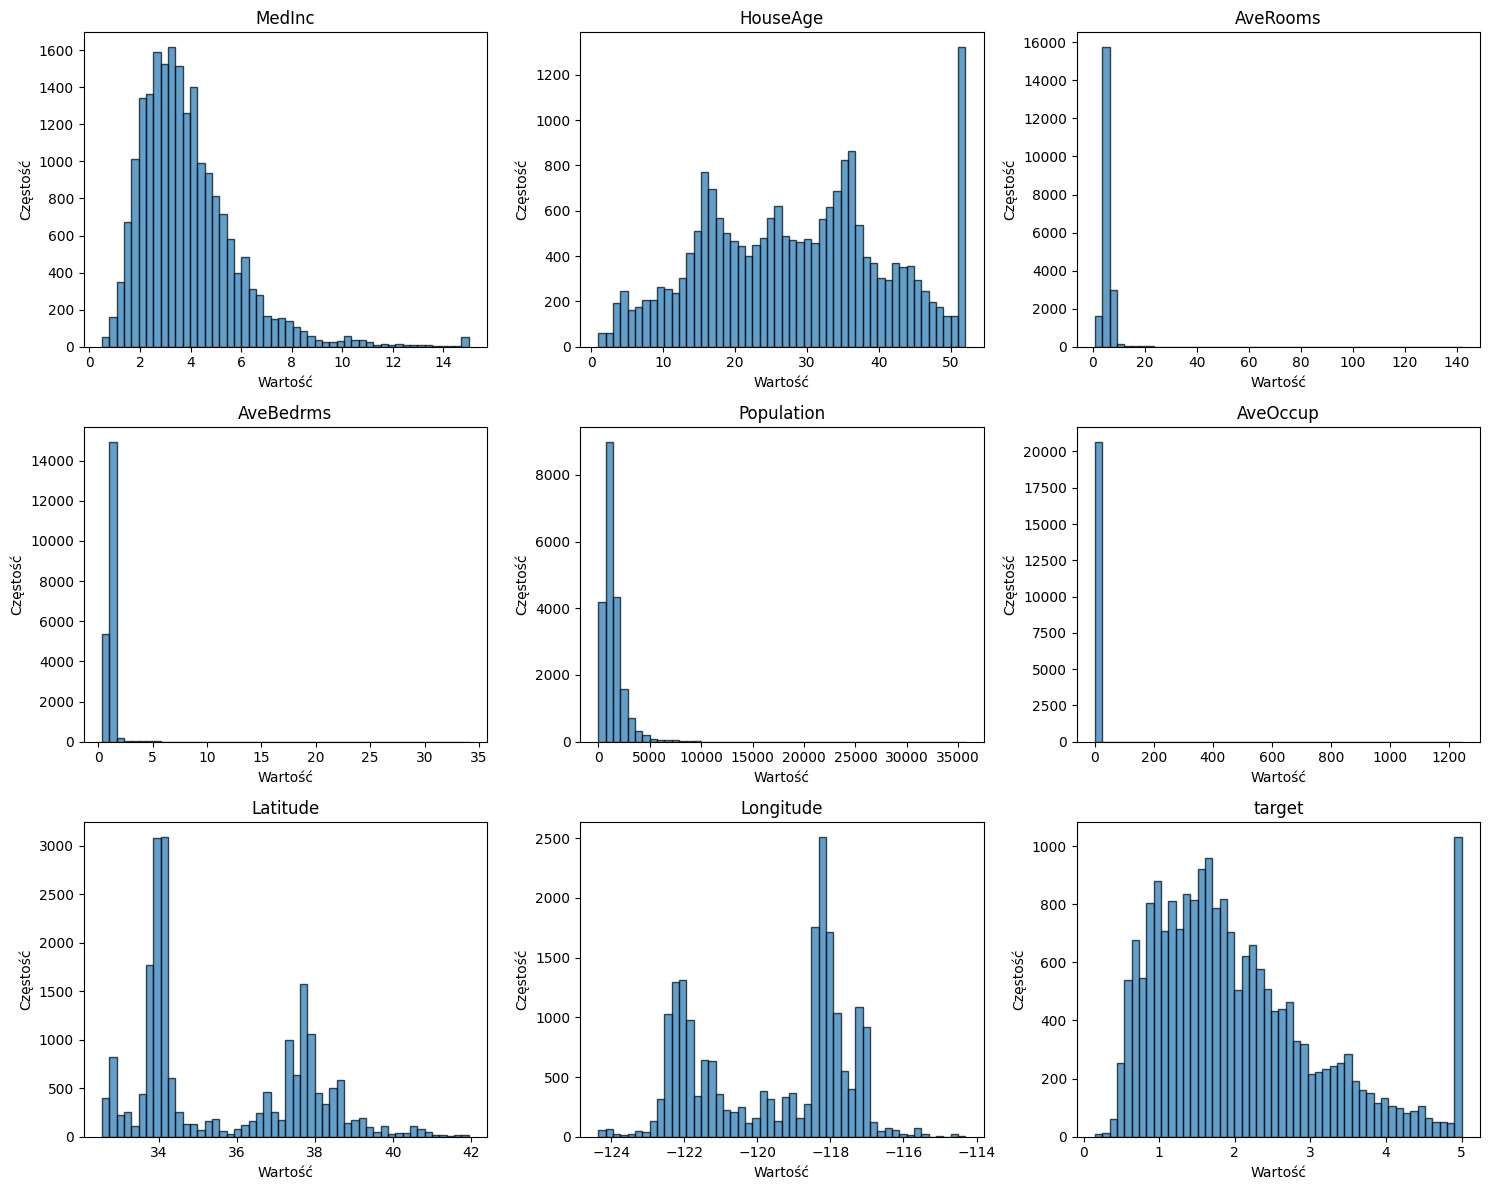


INŻYNIERIA CECH DLA REGRESJI

KROK 1: Transformacje nieliniowe
  Utworzono Population_log
  Utworzono AveOccup_log
  Utworzono MedInc_sqrt
  Utworzono AveRooms_boxcox, AveBedrms_boxcox

KROK 2: Tworzenie cech domenowych
  RoomBedroomRatio: stosunek pokoi do sypialni
  PopulationDensity: gęstość zaludnienia
  IncomePerPerson: dochód na osobę
  TotalRooms: całkowita liczba pokoi

KROK 3: Binning zmiennych ciągłych
  HouseAge podzielony na kategorie: VeryNew, New, Medium, Old

KROK 4: Cechy wielomianowe i interakcje
  MedInc_x_HouseAge: interakcja między cechami
  MedInc_x_AveRooms: interakcja między cechami
  AveRooms_x_AveBedrms: interakcja między cechami
  Latitude_x_Longitude: interakcja między cechami
  MedInc_squared: cecha kwadratowa
  AveRooms_squared: cecha kwadratowa

Liczba cech po inżynierii: 26

KROK 5: Skalowanie cech
  Wszystkie cechy przeskalowane (StandardScaler)

SELEKCJA CECH

SelectKBest (k=15):
  Wybrane cechy: ['MedInc', 'HouseAge', 'AveRooms', 'Latitude', 'AveOccup

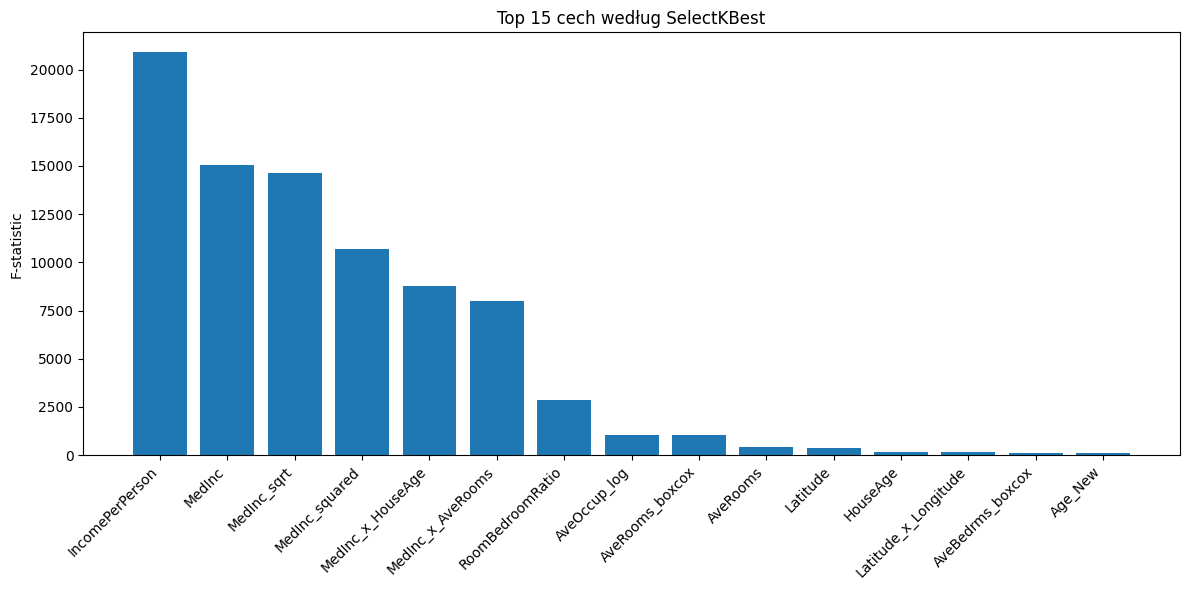


PORÓWNANIE MODELI

Model na oryginalnych cechach:
  CV RMSE: 0.7206

Model po inżynierii cech:
  CV RMSE: 0.6358

Model po selekcji cech:
  CV RMSE: 0.6404


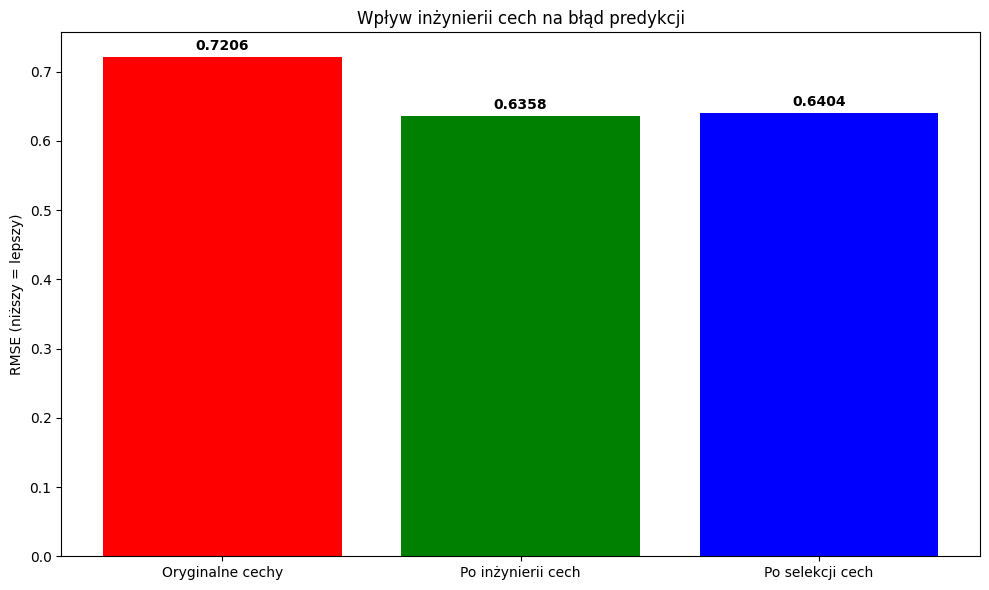


FINALNA OCENA NA ZBIORZE TESTOWYM

RMSE: 0.6834
R²: 0.6436


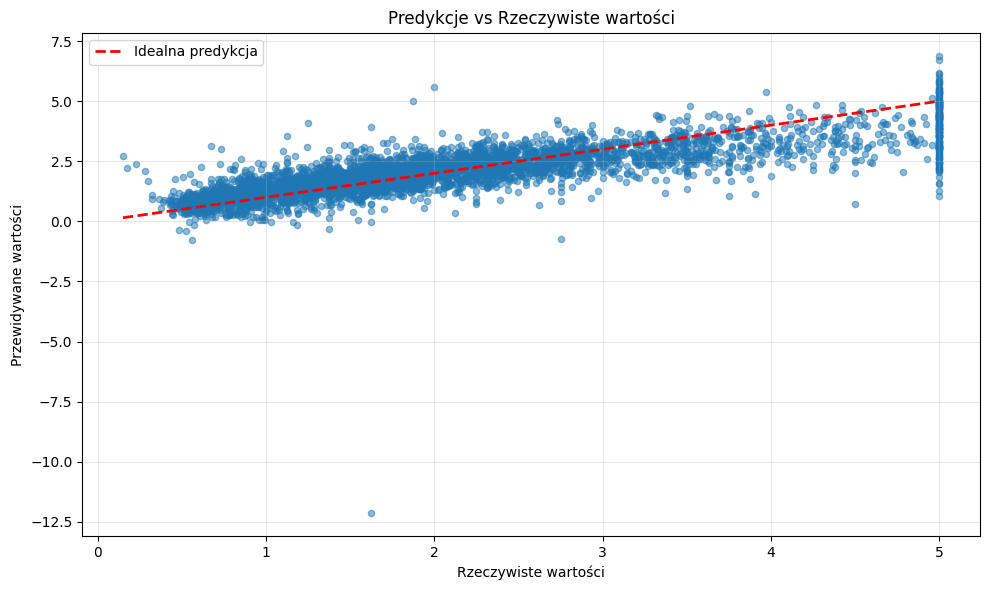


Wnioski:
- Transformacje nieliniowe pomogły znormalizować skośne rozkłady
- Cechy domenowe (ratios, density) wniosły dodatkową wartość
- Interakcje między cechami ujawniły ukryte zależności
- Selekcja cech zredukowała wymiarowość bez utraty wydajności


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, PowerTransformer
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

# Załadowanie danych
data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

print("="*70)
print("PROBLEM: PRZEWIDYWANIE CEN DOMÓW W KALIFORNII")
print("="*70)
print(f"\nRozmiar zbioru: {df.shape}")
print(f"\nOpis cech:")
for i, name in enumerate(data.feature_names):
    print(f"  {name}: {data.feature_names[i]}")
print(f"\nStatystyki:")
print(df.describe())

# Analiza rozkładów
fig, axes = plt.subplots(3, 3, figsize=(15, 12))
axes = axes.ravel()

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins=50, edgecolor='black', alpha=0.7)
    axes[i].set_title(f'{col}')
    axes[i].set_xlabel('Wartość')
    axes[i].set_ylabel('Częstość')

plt.tight_layout()
plt.show()

X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("\n" + "="*70)
print("INŻYNIERIA CECH DLA REGRESJI")
print("="*70)

# KROK 1: Transformacje nieliniowe dla skośnych rozkładów
print("\nKROK 1: Transformacje nieliniowe")

X_train_fe = X_train.copy()
X_test_fe = X_test.copy()

# Log transform dla cech ze skośnym rozkładem
skewed_features = ['Population', 'AveOccup']

for feat in skewed_features:
    # Dodaj małą stałą aby uniknąć log(0)
    X_train_fe[f'{feat}_log'] = np.log1p(X_train_fe[feat])
    X_test_fe[f'{feat}_log'] = np.log1p(X_test_fe[feat])
    print(f"  Utworzono {feat}_log")

# Square root transform
X_train_fe['MedInc_sqrt'] = np.sqrt(X_train_fe['MedInc'])
X_test_fe['MedInc_sqrt'] = np.sqrt(X_test_fe['MedInc'])
print(f"  Utworzono MedInc_sqrt")

# Box-Cox transform dla wszystkich dodatnich cech
pt = PowerTransformer(method='yeo-johnson', standardize=False)
transformed_features = pt.fit_transform(X_train_fe[['AveRooms', 'AveBedrms']])
X_train_fe['AveRooms_boxcox'] = transformed_features[:, 0]
X_train_fe['AveBedrms_boxcox'] = transformed_features[:, 1]

transformed_features_test = pt.transform(X_test_fe[['AveRooms', 'AveBedrms']])
X_test_fe['AveRooms_boxcox'] = transformed_features_test[:, 0]
X_test_fe['AveBedrms_boxcox'] = transformed_features_test[:, 1]
print(f"  Utworzono AveRooms_boxcox, AveBedrms_boxcox")

# KROK 2: Tworzenie cech domenowych
print("\nKROK 2: Tworzenie cech domenowych")

# Stosunek pokoi do sypialni
X_train_fe['RoomBedroomRatio'] = X_train_fe['AveRooms'] / (X_train_fe['AveBedrms'] + 1e-5)
X_test_fe['RoomBedroomRatio'] = X_test_fe['AveRooms'] / (X_test_fe['AveBedrms'] + 1e-5)
print("  RoomBedroomRatio: stosunek pokoi do sypialni")

# Gęstość populacji
X_train_fe['PopulationDensity'] = X_train_fe['Population'] / (X_train_fe['AveOccup'] + 1e-5)
X_test_fe['PopulationDensity'] = X_test_fe['Population'] / (X_test_fe['AveOccup'] + 1e-5)
print("  PopulationDensity: gęstość zaludnienia")

# Dochód per capita w gospodarstwie domowym
X_train_fe['IncomePerPerson'] = X_train_fe['MedInc'] / X_train_fe['AveOccup']
X_test_fe['IncomePerPerson'] = X_test_fe['MedInc'] / X_test_fe['AveOccup']
print("  IncomePerPerson: dochód na osobę")

# Całkowita liczba pokoi w bloku
X_train_fe['TotalRooms'] = X_train_fe['AveRooms'] * X_train_fe['AveOccup']
X_test_fe['TotalRooms'] = X_test_fe['AveRooms'] * X_test_fe['AveOccup']
print("  TotalRooms: całkowita liczba pokoi")

# KROK 3: Binning - dyskretyzacja ciągłych zmiennych
print("\nKROK 3: Binning zmiennych ciągłych")

# Binning dla HouseAge
age_bins = [0, 10, 20, 30, 52]
age_labels = ['VeryNew', 'New', 'Medium', 'Old']
X_train_fe['HouseAge_binned'] = pd.cut(X_train_fe['HouseAge'], bins=age_bins, labels=age_labels)
X_test_fe['HouseAge_binned'] = pd.cut(X_test_fe['HouseAge'], bins=age_bins, labels=age_labels)

# One-hot encoding dla zbinowanego wieku
age_dummies_train = pd.get_dummies(X_train_fe['HouseAge_binned'], prefix='Age', drop_first=True)
age_dummies_test = pd.get_dummies(X_test_fe['HouseAge_binned'], prefix='Age', drop_first=True)

X_train_fe = pd.concat([X_train_fe, age_dummies_train], axis=1)
X_test_fe = pd.concat([X_test_fe, age_dummies_test], axis=1)
X_train_fe.drop('HouseAge_binned', axis=1, inplace=True)
X_test_fe.drop('HouseAge_binned', axis=1, inplace=True)

print("  HouseAge podzielony na kategorie: VeryNew, New, Medium, Old")

# KROK 4: Cechy wielomianowe (interakcje)
print("\nKROK 4: Cechy wielomianowe i interakcje")

# Wybrane interakcje zamiast wszystkich kombinacji (by uniknąć wybuchu wymiarowości)
interaction_pairs = [
    ('MedInc', 'HouseAge'),
    ('MedInc', 'AveRooms'),
    ('AveRooms', 'AveBedrms'),
    ('Latitude', 'Longitude')
]

for feat1, feat2 in interaction_pairs:
    X_train_fe[f'{feat1}_x_{feat2}'] = X_train_fe[feat1] * X_train_fe[feat2]
    X_test_fe[f'{feat1}_x_{feat2}'] = X_test_fe[feat1] * X_test_fe[feat2]
    print(f"  {feat1}_x_{feat2}: interakcja między cechami")

# Cechy kwadratowe dla wybranych zmiennych
for feat in ['MedInc', 'AveRooms']:
    X_train_fe[f'{feat}_squared'] = X_train_fe[feat] ** 2
    X_test_fe[f'{feat}_squared'] = X_test_fe[feat] ** 2
    print(f"  {feat}_squared: cecha kwadratowa")

print(f"\nLiczba cech po inżynierii: {X_train_fe.shape[1]}")

# KROK 5: Skalowanie
print("\nKROK 5: Skalowanie cech")

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_fe)
X_test_scaled = scaler.transform(X_test_fe)

print("  Wszystkie cechy przeskalowane (StandardScaler)")

# KROK 6: Selekcja cech
print("\n" + "="*70)
print("SELEKCJA CECH")
print("="*70)

# Metoda 1: SelectKBest
k_best = 15
selector = SelectKBest(f_regression, k=k_best)
X_train_selected = selector.fit_transform(X_train_scaled, y_train)
X_test_selected = selector.transform(X_test_scaled)

selected_features = X_train_fe.columns[selector.get_support()].tolist()
print(f"\nSelectKBest (k={k_best}):")
print(f"  Wybrane cechy: {selected_features}")

# Scores dla wszystkich cech
feature_scores = pd.DataFrame({
    'feature': X_train_fe.columns,
    'score': selector.scores_
}).sort_values('score', ascending=False)

print(f"\nTop 10 cech według F-statistic:")
print(feature_scores.head(10))

# Wizualizacja
plt.figure(figsize=(12, 6))
plt.bar(range(len(feature_scores.head(15))), feature_scores.head(15)['score'])
plt.xticks(range(len(feature_scores.head(15))), feature_scores.head(15)['feature'], rotation=45, ha='right')
plt.ylabel('F-statistic')
plt.title('Top 15 cech według SelectKBest')
plt.tight_layout()
plt.show()

# KROK 7: Porównanie modeli
print("\n" + "="*70)
print("PORÓWNANIE MODELI")
print("="*70)

results = {}

# Model 1: Na oryginalnych cechach
lr_original = Ridge(alpha=1.0)
scores_original = cross_val_score(lr_original,
                                   StandardScaler().fit_transform(X_train),
                                   y_train, cv=5,
                                   scoring='neg_mean_squared_error')
results['Oryginalne cechy'] = -scores_original.mean()
print(f"\nModel na oryginalnych cechach:")
print(f"  CV RMSE: {np.sqrt(-scores_original.mean()):.4f}")

# Model 2: Po inżynierii cech
lr_fe = Ridge(alpha=1.0)
scores_fe = cross_val_score(lr_fe, X_train_scaled, y_train, cv=5,
                            scoring='neg_mean_squared_error')
results['Po inżynierii cech'] = -scores_fe.mean()
print(f"\nModel po inżynierii cech:")
print(f"  CV RMSE: {np.sqrt(-scores_fe.mean()):.4f}")

# Model 3: Po selekcji cech
lr_selected = Ridge(alpha=1.0)
scores_selected = cross_val_score(lr_selected, X_train_selected, y_train, cv=5,
                                  scoring='neg_mean_squared_error')
results['Po selekcji cech'] = -scores_selected.mean()
print(f"\nModel po selekcji cech:")
print(f"  CV RMSE: {np.sqrt(-scores_selected.mean()):.4f}")

# Wykres porównania
plt.figure(figsize=(10, 6))
plt.bar(results.keys(), [np.sqrt(v) for v in results.values()],
        color=['red', 'green', 'blue'])
plt.ylabel('RMSE (niższy = lepszy)')
plt.title('Wpływ inżynierii cech na błąd predykcji')
for i, (k, v) in enumerate(results.items()):
    plt.text(i, np.sqrt(v) + 0.01, f'{np.sqrt(v):.4f}', ha='center', fontweight='bold')
plt.tight_layout()
plt.show()

# Finalna ocena
lr_fe.fit(X_train_scaled, y_train)
y_pred = lr_fe.predict(X_test_scaled)

print("\n" + "="*70)
print("FINALNA OCENA NA ZBIORZE TESTOWYM")
print("="*70)
print(f"\nRMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.4f}")
print(f"R²: {r2_score(y_test, y_pred):.4f}")

# Wizualizacja predykcji
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, s=20)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()],
         'r--', lw=2, label='Idealna predykcja')
plt.xlabel('Rzeczywiste wartości')
plt.ylabel('Przewidywane wartości')
plt.title('Predykcje vs Rzeczywiste wartości')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("\nWnioski:")
print("- Transformacje nieliniowe pomogły znormalizować skośne rozkłady")
print("- Cechy domenowe (ratios, density) wniosły dodatkową wartość")
print("- Interakcje między cechami ujawniły ukryte zależności")
print("- Selekcja cech zredukowała wymiarowość bez utraty wydajności")

## Przykład 3: Klasteryzacja - Redukcja wymiarowości i transformacje

PROBLEM: KLASTERYZACJA OBRAZÓW CYFR

Rozmiar zbioru: (1797, 64)
Liczba klas: 10
Opis: Każdy obraz to 8x8 pikseli (64 cechy)


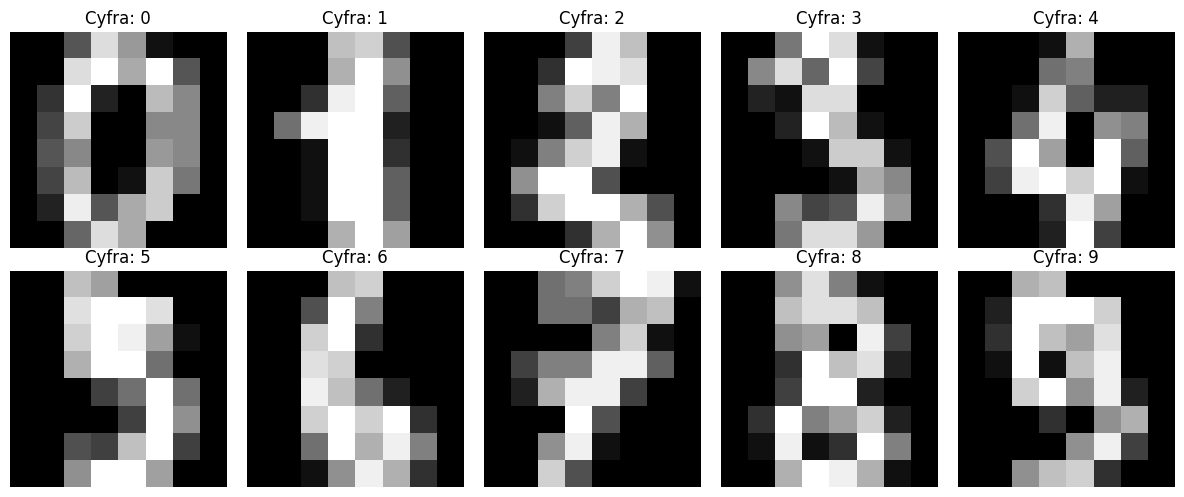


INŻYNIERIA CECH DLA KLASTERYZACJI

KROK 1: Analiza i czyszczenie danych

Statystyki wariancji cech:
  Min wariancja: 0.0000
  Max wariancja: 42.7211
  Średnia wariancja: 18.7731

Cechy po filtrowaniu wariancji: 48 (było 64)

KROK 2: Tworzenie cech domenowych dla obrazów
  Dodano cechy: mean, std, max, min intensywności
  Dodano: liczba aktywnych pikseli (>8)
  Dodano: gęstość pikseli

Liczba cech po dodaniu domenowych: 54

KROK 3: Skalowanie cech
  Wszystkie cechy przeskalowane

REDUKCJA WYMIAROWOŚCI - PCA


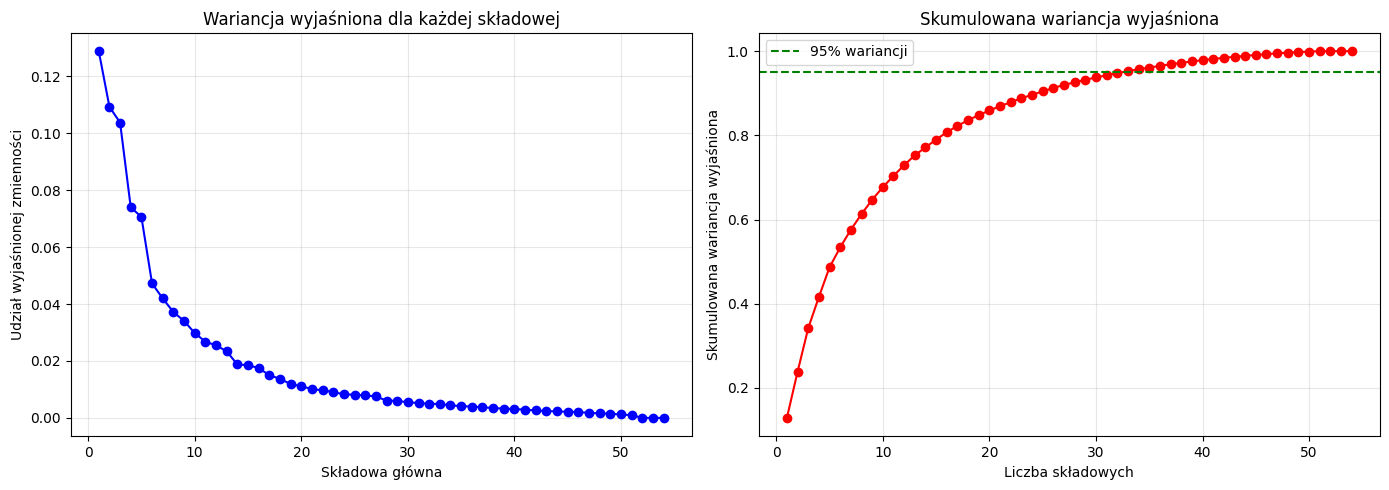


Liczba składowych dla 95% wariancji: 33
wariancja wyjaśniona (2D): 0.2382
Zredukowano wymiarowość z 54 do 33 cech

REDUKCJA WYMIAROWOŚCI - t-SNE
Obliczanie t-SNE (może potrwać chwilę)...
t-SNE zakończone

KLASTERYZACJA - PORÓWNANIE PRZESTRZENI CECH

Oryginalne cechy (54 cech):
  Współczynnik silhouette score: 0.1536
  Indeks Daviesa-Bouldina: 1.8883

PCA (2D) (2 cech):
  Współczynnik silhouette score: 0.3833
  Indeks Daviesa-Bouldina: 0.7908

PCA (optimal) (33 cech):
  Współczynnik silhouette score: 0.1530
  Indeks Daviesa-Bouldina: 1.9862

t-SNE (2D) (2 cech):
  Współczynnik silhouette score: 0.5743
  Indeks Daviesa-Bouldina: 0.5910


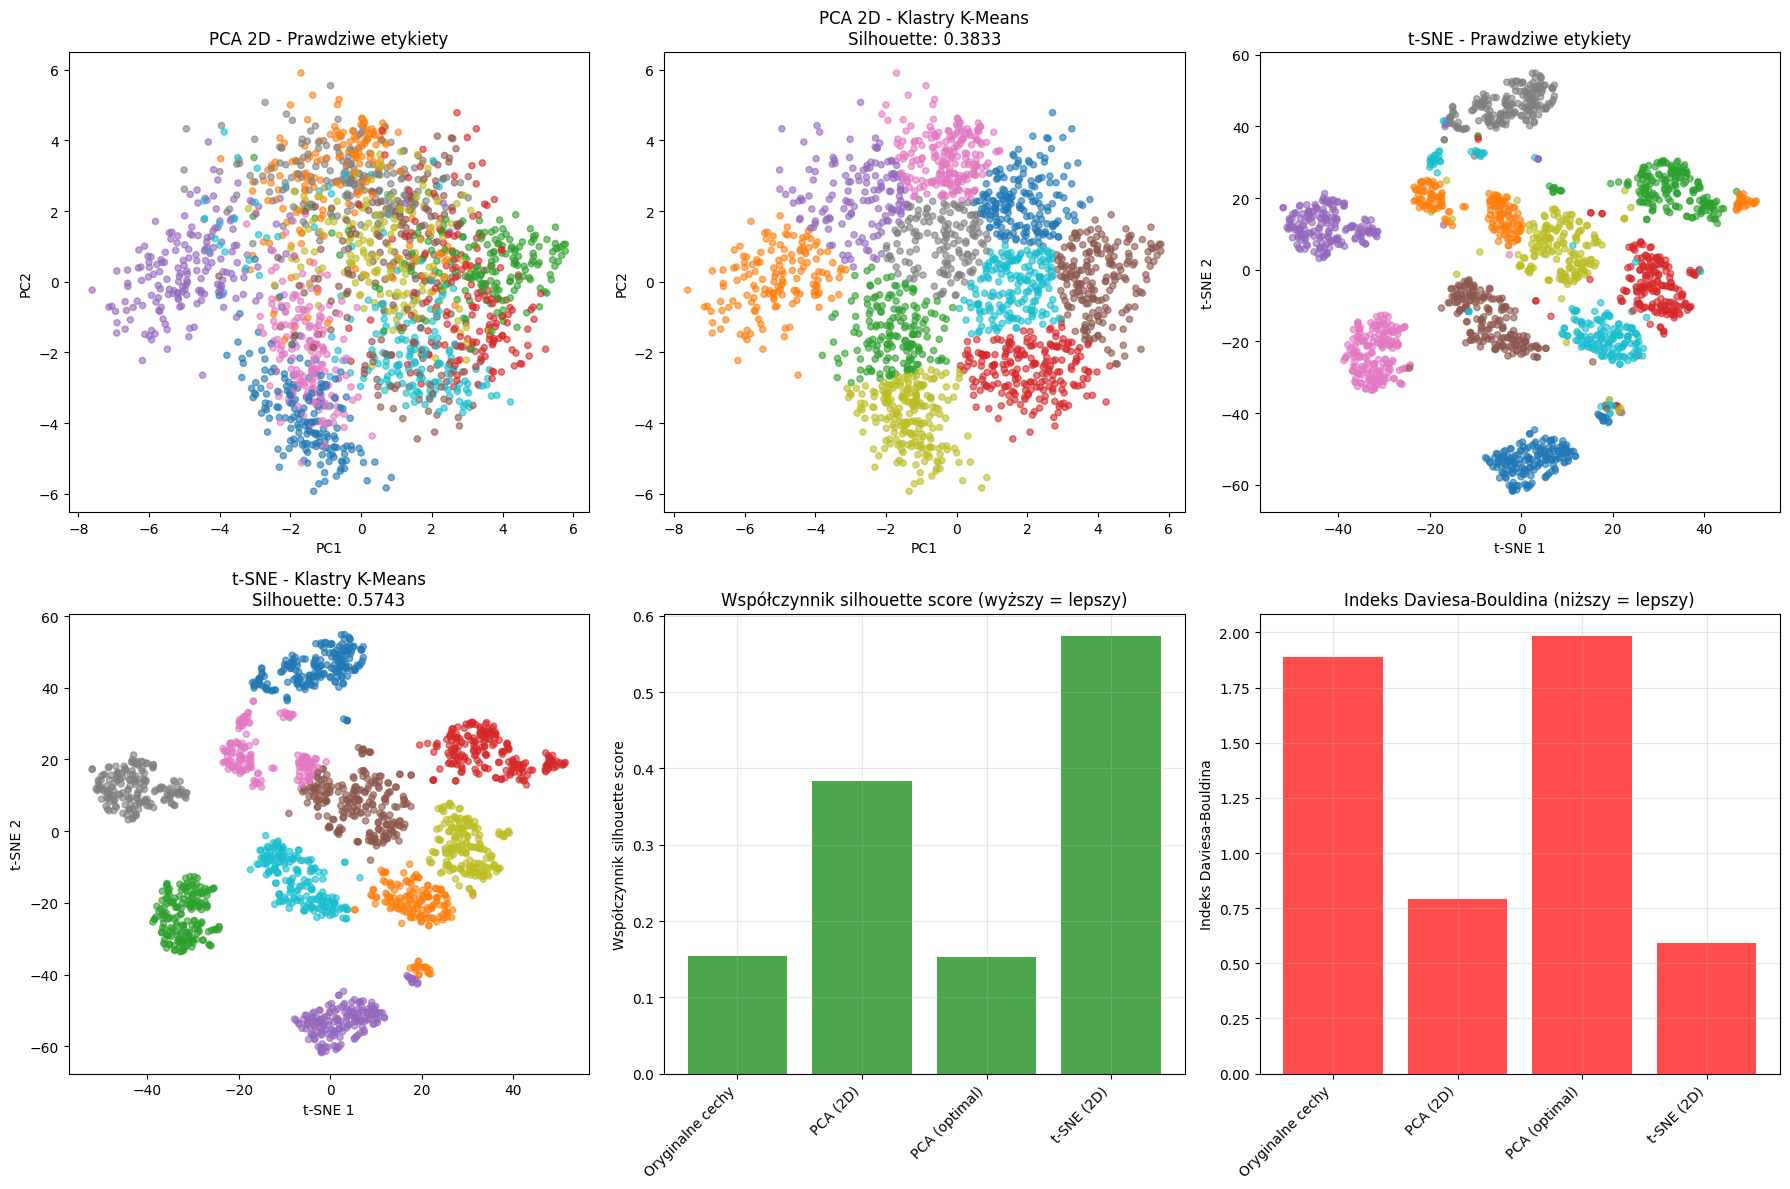


ANALIZA KOMPONENTÓW PCA


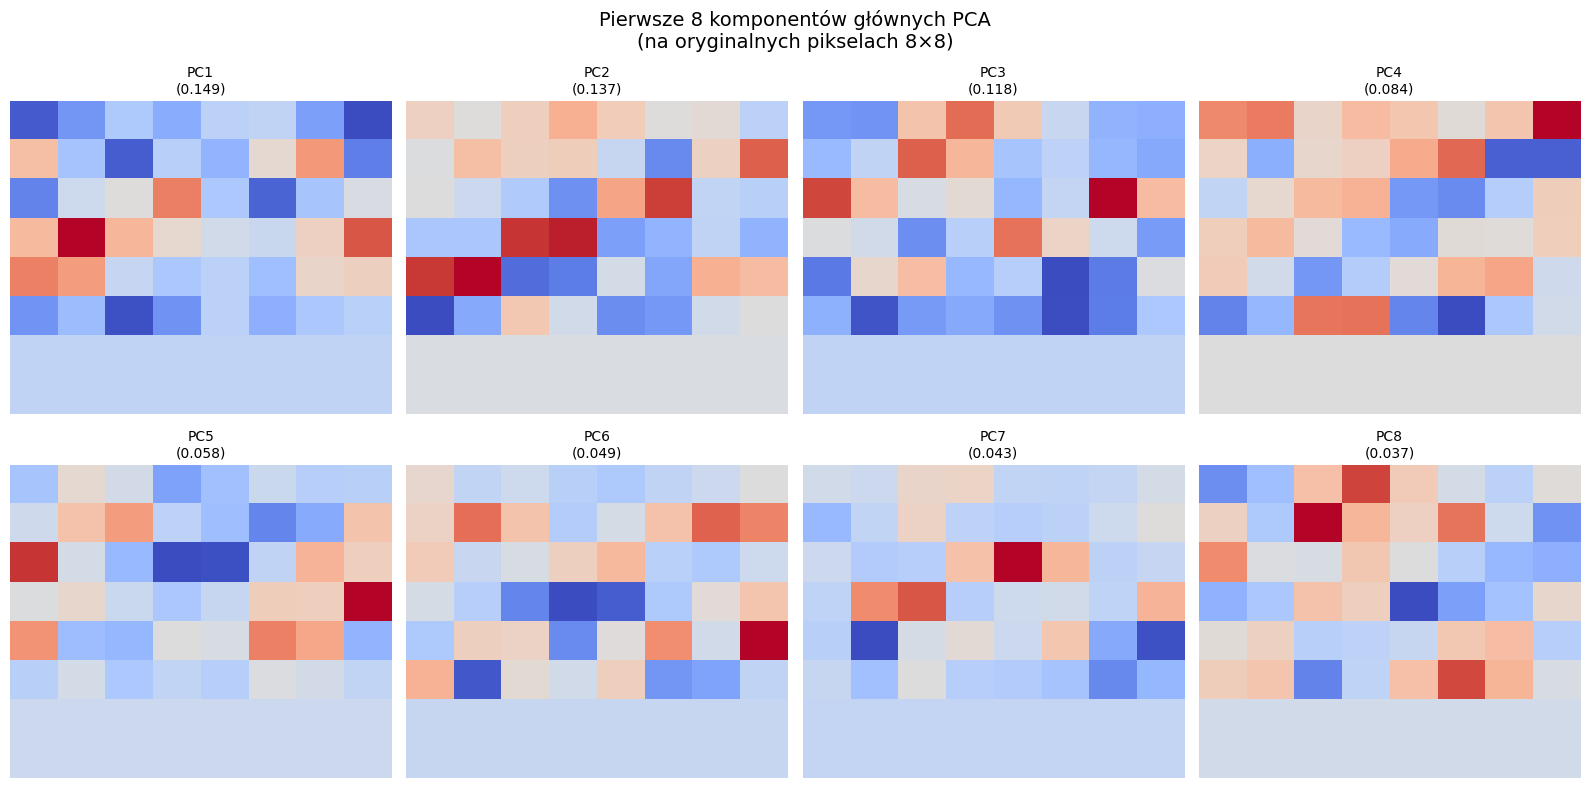


Uwaga: Komponenty PCA są wizualizowane jako obrazy 8×8
Jaśniejsze obszary = dodatni wpływ, ciemniejsze = ujemny wpływ piksela

Wnioski:
- PCA skutecznie redukuje wymiarowość zachowując większość informacji
- t-SNE lepiej rozdziela klastry wizualnie, ale nie zachowuje globalnej struktury
- Cechy domenowe (intensywność, gęstość) mogą poprawić klasteryzację
- Wybór przestrzeni cech wpływa na jakość klasteryzacji
- Redukcja wymiarowości jest kluczowa dla wysokowymiarowych danych


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.feature_selection import VarianceThreshold
import warnings
warnings.filterwarnings('ignore')

# Załadowanie danych - cyfry pisane ręcznie
digits = load_digits()
X = digits.data
y_true = digits.target  # Używamy tylko do walidacji

print("="*70)
print("PROBLEM: KLASTERYZACJA OBRAZÓW CYFR")
print("="*70)
print(f"\nRozmiar zbioru: {X.shape}")
print(f"Liczba klas: {len(np.unique(y_true))}")
print(f"Opis: Każdy obraz to 8x8 pikseli (64 cechy)")

# Wizualizacja przykładowych obrazów
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f'Cyfra: {y_true[i]}')
    ax.axis('off')
plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("INŻYNIERIA CECH DLA KLASTERYZACJI")
print("="*70)

# KROK 1: Podstawowe statystyki
print("\nKROK 1: Analiza i czyszczenie danych")

# Sprawdzenie wariancji cech
variances = np.var(X, axis=0)
print(f"\nStatystyki wariancji cech:")
print(f"  Min wariancja: {variances.min():.4f}")
print(f"  Max wariancja: {variances.max():.4f}")
print(f"  Średnia wariancja: {variances.mean():.4f}")

# Usunięcie cech z bardzo niską wariancją (jeśli są)
selector = VarianceThreshold(threshold=1.0)
X_var_filtered = selector.fit_transform(X)
print(f"\nCechy po filtrowaniu wariancji: {X_var_filtered.shape[1]} (było {X.shape[1]})")

# KROK 2: Tworzenie nowych cech domenowych
print("\nKROK 2: Tworzenie cech domenowych dla obrazów")

# Tworzymy DataFrame z nazwami kolumn jako stringi
X_fe = pd.DataFrame(X_var_filtered, columns=[f'pixel_{i}' for i in range(X_var_filtered.shape[1])])

# Statystyki intensywności pikseli
X_fe['mean_intensity'] = np.mean(X_var_filtered, axis=1)
X_fe['std_intensity'] = np.std(X_var_filtered, axis=1)
X_fe['max_intensity'] = np.max(X_var_filtered, axis=1)
X_fe['min_intensity'] = np.min(X_var_filtered, axis=1)

print("  Dodano cechy: mean, std, max, min intensywności")

# Liczba "aktywnych" pikseli (powyżej pewnego progu)
threshold = 8
X_fe['active_pixels'] = np.sum(X_var_filtered > threshold, axis=1)
print(f"  Dodano: liczba aktywnych pikseli (>{threshold})")

# Symetria (porównanie lewej i prawej połowy)
# Zakładamy, że obraz to 8x8, więc mamy 64 piksele
img_width = 8
left_half = X_var_filtered[:, :img_width//2 * img_width]
right_half = X_var_filtered[:, img_width//2 * img_width:]

if left_half.shape[1] == right_half.shape[1]:
    X_fe['symmetry'] = np.sum(np.abs(left_half - np.fliplr(right_half.reshape(-1, img_width//2, img_width)).reshape(right_half.shape)), axis=1)
    print("  Dodano: miara symetrii obrazu")

# Gęstość pikseli (stosunek aktywnych do wszystkich)
X_fe['density'] = X_fe['active_pixels'] / X_var_filtered.shape[1]
print("  Dodano: gęstość pikseli")

print(f"\nLiczba cech po dodaniu domenowych: {X_fe.shape[1]}")

# KROK 3: Skalowanie
print("\nKROK 3: Skalowanie cech")

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_fe)
print("  Wszystkie cechy przeskalowane")

# KROK 4: Redukcja wymiarowości - PCA
print("\n" + "="*70)
print("REDUKCJA WYMIAROWOŚCI - PCA")
print("="*70)

# Analiza wariancji wyjaśnionej
pca_full = PCA()
pca_full.fit(X_scaled)

cumsum_var = np.cumsum(pca_full.explained_variance_ratio_)

# Wykres wariancji wyjaśnionej
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].plot(range(1, len(pca_full.explained_variance_ratio_) + 1),
             pca_full.explained_variance_ratio_, 'bo-')
axes[0].set_xlabel('Składowa główna')
axes[0].set_ylabel('Udział wyjaśnionej zmienności')
axes[0].set_title('Wariancja wyjaśniona dla każdej składowej')
axes[0].grid(True, alpha=0.3)

axes[1].plot(range(1, len(cumsum_var) + 1), cumsum_var, 'ro-')
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95% wariancji')
axes[1].set_xlabel('Liczba składowych')
axes[1].set_ylabel('Skumulowana wariancja wyjaśniona')
axes[1].set_title('Skumulowana wariancja wyjaśniona')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Znajdź liczbę składowych dla 95% wariancji
n_components_95 = np.argmax(cumsum_var >= 0.95) + 1
print(f"\nLiczba składowych dla 95% wariancji: {n_components_95}")

# Redukcja do 2D dla wizualizacji
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)
print(f"wariancja wyjaśniona (2D): {sum(pca_2d.explained_variance_ratio_):.4f}")

# Redukcja do optymalnej liczby składowych
pca_optimal = PCA(n_components=n_components_95)
X_pca = pca_optimal.fit_transform(X_scaled)
print(f"Zredukowano wymiarowość z {X_scaled.shape[1]} do {X_pca.shape[1]} cech")

# KROK 5: t-SNE dla porównania
print("\n" + "="*70)
print("REDUKCJA WYMIAROWOŚCI - t-SNE")
print("="*70)

print("Obliczanie t-SNE (może potrwać chwilę)...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)
print("t-SNE zakończone")

# KROK 6: Klasteryzacja i porównanie
print("\n" + "="*70)
print("KLASTERYZACJA - PORÓWNANIE PRZESTRZENI CECH")
print("="*70)

n_clusters = 10  # Wiemy, że są cyfry 0-9

datasets = {
    'Oryginalne cechy': X_scaled,
    'PCA (2D)': X_pca_2d,
    'PCA (optimal)': X_pca,
    't-SNE (2D)': X_tsne
}

results = {}

for name, data in datasets.items():
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data)

    silhouette = silhouette_score(data, labels)
    davies_bouldin = davies_bouldin_score(data, labels)

    results[name] = {
        'silhouette': silhouette,
        'davies_bouldin': davies_bouldin,
        'labels': labels
    }

    print(f"\n{name} ({data.shape[1]} cech):")
    print(f"  Współczynnik silhouette score: {silhouette:.4f}")
    print(f"  Indeks Daviesa-Bouldina: {davies_bouldin:.4f}")

# Wizualizacja klasteryzacji dla przestrzeni 2D
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# PCA 2D - rzeczywiste etykiety
axes[0, 0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=y_true, cmap='tab10', s=20, alpha=0.6)
axes[0, 0].set_title('PCA 2D - Prawdziwe etykiety')
axes[0, 0].set_xlabel('PC1')
axes[0, 0].set_ylabel('PC2')

# PCA 2D - klastry
axes[0, 1].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                   c=results['PCA (2D)']['labels'], cmap='tab10', s=20, alpha=0.6)
axes[0, 1].set_title(f"PCA 2D - Klastry K-Means\nSilhouette: {results['PCA (2D)']['silhouette']:.4f}")
axes[0, 1].set_xlabel('PC1')
axes[0, 1].set_ylabel('PC2')

# t-SNE - rzeczywiste etykiety
axes[0, 2].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_true, cmap='tab10', s=20, alpha=0.6)
axes[0, 2].set_title('t-SNE - Prawdziwe etykiety')
axes[0, 2].set_xlabel('t-SNE 1')
axes[0, 2].set_ylabel('t-SNE 2')

# t-SNE - klastry
axes[1, 0].scatter(X_tsne[:, 0], X_tsne[:, 1],
                   c=results['t-SNE (2D)']['labels'], cmap='tab10', s=20, alpha=0.6)
axes[1, 0].set_title(f"t-SNE - Klastry K-Means\nSilhouette: {results['t-SNE (2D)']['silhouette']:.4f}")
axes[1, 0].set_xlabel('t-SNE 1')
axes[1, 0].set_ylabel('t-SNE 2')

# Porównanie metryk
metrics_names = list(results.keys())
silhouette_scores = [results[name]['silhouette'] for name in metrics_names]
davies_bouldin_scores = [results[name]['davies_bouldin'] for name in metrics_names]

axes[1, 1].bar(range(len(metrics_names)), silhouette_scores, color='green', alpha=0.7)
axes[1, 1].set_xticks(range(len(metrics_names)))
axes[1, 1].set_xticklabels(metrics_names, rotation=45, ha='right')
axes[1, 1].set_ylabel('Współczynnik silhouette score')
axes[1, 1].set_title('Współczynnik silhouette score (wyższy = lepszy)')
axes[1, 1].grid(True, alpha=0.3)

axes[1, 2].bar(range(len(metrics_names)), davies_bouldin_scores, color='red', alpha=0.7)
axes[1, 2].set_xticks(range(len(metrics_names)))
axes[1, 2].set_xticklabels(metrics_names, rotation=45, ha='right')
axes[1, 2].set_ylabel('Indeks Daviesa-Bouldina')
axes[1, 2].set_title('Indeks Daviesa-Bouldina (niższy = lepszy)')
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n" + "="*70)
print("ANALIZA KOMPONENTÓW PCA")
print("="*70)

# Wizualizacja najważniejszych komponentów
# UWAGA: Musimy użyć PCA na ORYGINALNYCH danych (64 piksele), nie na rozszerzonych
pca_viz = PCA(n_components=8)
pca_viz.fit(X_var_filtered)  # Tylko oryginalne piksele

fig, axes = plt.subplots(2, 4, figsize=(16, 8))
for i, ax in enumerate(axes.flat):
    # Każdy komponent to 64 wartości (odpowiadające 64 pikselom)
    component = pca_viz.components_[i]

    # Reshape do 8x8
    if X_var_filtered.shape[1] >= 64:
        component_img = component[:64].reshape(8, 8)
    else:
        # Jeśli mniej niż 64, dopełnij zerami
        component_padded = np.zeros(64)
        component_padded[:len(component)] = component
        component_img = component_padded.reshape(8, 8)

    ax.imshow(component_img, cmap='coolwarm', aspect='auto')
    ax.set_title(f'PC{i+1}\n({pca_viz.explained_variance_ratio_[i]:.3f})',
                 fontsize=10)
    ax.axis('off')

plt.suptitle('Pierwsze 8 komponentów głównych PCA\n(na oryginalnych pikselach 8×8)',
             fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

print("\nUwaga: Komponenty PCA są wizualizowane jako obrazy 8×8")
print("Jaśniejsze obszary = dodatni wpływ, ciemniejsze = ujemny wpływ piksela")

print("\nWnioski:")
print("- PCA skutecznie redukuje wymiarowość zachowując większość informacji")
print("- t-SNE lepiej rozdziela klastry wizualnie, ale nie zachowuje globalnej struktury")
print("- Cechy domenowe (intensywność, gęstość) mogą poprawić klasteryzację")
print("- Wybór przestrzeni cech wpływa na jakość klasteryzacji")
print("- Redukcja wymiarowości jest kluczowa dla wysokowymiarowych danych")

# Podsumowanie

Najważniejsze zasady inżynierii cech:

1. **Rozumienie danych** - zacznij od eksploracji i analizy danych
2. **Wiedza domenowa** - używaj wiedzy o problemie do tworzenia sensownych cech
3. **Iteracyjność** - inżynieria cech to proces iteracyjny, testuj różne pomysły
4. **Transformacje** - normalizuj rozkłady, skaluj cechy
5. **Tworzenie interakcji** - kombinuj cechy aby ujawnić ukryte zależności
6. **Selekcja cech** - usuń zbędne cechy aby uniknąć przeuczenia
7. **Walidacja** - zawsze sprawdzaj wpływ nowych cech na wydajność modelu
8. **Leakage** - uważaj na wyciek informacji ze zbioru testowego
9. **Automatyzacja** - używaj pipeline'ów do reprodukowalności
10. **Dokumentacja** - zapisuj proces tworzenia cech dla późniejszego użycia

## Dodatkowe techniki

- **"Target encoding"** - kodowanie kategorii na podstawie wartości docelowej (trzeba uważać na przeuczenie)
- **"Embedding"** - reprezentacje uczone przez sieci neuronowe
- **"Feature hashing"** - dla bardzo wysokich wymiarowości
- **"Time-based features"** - opóźnienia, średnie kroczące, trendy

## Narzędzia

- **Feature-engine** - biblioteka dedykowana inżynierii cech
- **Category Encoders** - różne metody kodowania zmiennych kategorycznych
- **TPOT / Auto-sklearn** - automatyczna inżynieria cech
- **Featuretools** - automatyczne tworzenie cech z danych relacyjnych